In [1]:
import keras

Using TensorFlow backend.


# CIFAR10
 - CIFAR-10 데이터 셋은 8천만 Labeled된 이미지들을 구별하는 데이터 셋이다. 
 - The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 
![CIFAR10](img/CIFAR10.PNG)

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Dataset
 - Dataset의 Shape를 확인. 
 - 크기, 가로, 세로, 색

In [4]:
n_train, width, height, color = x_train.shape

In [5]:
n_test, _, _, _ = x_test.shape

In [10]:
n_train, n_test

(50000, 10000)

In [9]:
width, height, color

(32, 32, 3)

## 데이터 보기

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

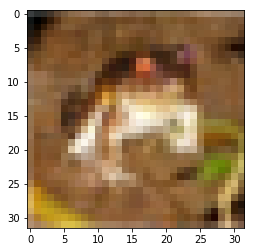

In [12]:
plt.imshow(x_train[0,])

In [17]:
print(y_train[0]) # 6번 Label => Frog

[6]


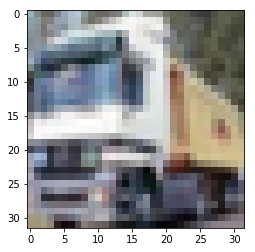

In [13]:
plt.imshow(x_train[1,])

In [18]:
y_train[1] # 9번 Label => Truck

array([9], dtype=uint8)

## 데이터 전처리
 - 최대값으로 정규화 필요.
 - Neural Network 연산이 쉽게.

In [29]:
import numpy  as np 

In [30]:
np.max(x_train), np.min(x_train) # 최대 최소

(255, 0)

In [31]:
x_train.astype('float32')
input_train = x_train / 255.0
x_test.astype('float32')
input_test = x_test / 255.0

 - Labeling : Change to Categorical Data

In [32]:
output_train = keras.utils.to_categorical(y_train, 10)
output_test = keras.utils.to_categorical(y_test, 10)

## 모델

In [33]:
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential

In [34]:
enc = Sequential()
enc.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
enc.add(MaxPooling2D((2, 2)))
enc.add(Conv2D(8, (3, 3), activation='relu'))
enc.add(MaxPooling2D((2, 2)))

In [35]:
enc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 8)           0         
Total params: 1,608
Trainable params: 1,608
Non-trainable params: 0
_________________________________________________________________


In [36]:
classifier = Sequential()
classifier.add(enc)
classifier.add(Flatten())
classifier.add(Dense(10, activation='softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 6, 6, 8)           1608      
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2890      
Total params: 4,498
Trainable params: 4,498
Non-trainable params: 0
_________________________________________________________________


In [55]:
BATCH_SIZE = 128
EPOCHS = 20
classifier.fit(input_train, output_train,
               batch_size=BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               validation_data=(input_test, output_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s - loss: 1.3015 - acc: 0.5426 - val_loss: 1.3185 - val_acc: 0.5408
Epoch 2/20
50000/50000 [==============================] - 5s - loss: 1.2914 - acc: 0.5447 - val_loss: 1.2950 - val_acc: 0.5491
Epoch 3/20
50000/50000 [==============================] - 5s - loss: 1.2769 - acc: 0.5548 - val_loss: 1.2783 - val_acc: 0.5572
Epoch 4/20
50000/50000 [==============================] - 5s - loss: 1.2652 - acc: 0.5547 - val_loss: 1.2656 - val_acc: 0.5584
Epoch 5/20
50000/50000 [==============================] - 5s - loss: 1.2598 - acc: 0.5576 - val_loss: 1.2954 - val_acc: 0.5412
Epoch 6/20
50000/50000 [==============================] - 6s - loss: 1.2454 - acc: 0.5640 - val_loss: 1.2582 - val_acc: 0.5649
Epoch 7/20
50000/50000 [==============================] - 5s - loss: 1.2339 - acc: 0.5660 - val_loss: 1.2691 - val_acc: 0.5502
Epoch 8/20
50000/50000 [==============================] - 5s 

## 예측 

In [56]:
predict = classifier.predict(input_test)

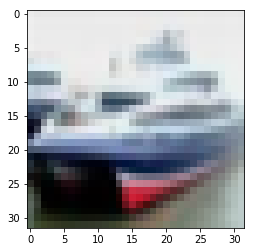

In [57]:
plt.imshow(input_test[1])

In [58]:
print(output_test[1])
print(np.where(output_test[1])) # 8번째 Label : Ship

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
(array([8], dtype=int64),)


In [59]:
predict[1]

array([  2.64636248e-01,   1.80491641e-01,   2.04590571e-04,
         2.43555714e-05,   1.48969557e-05,   2.19946469e-06,
         6.89067701e-06,   6.53384950e-06,   5.44204354e-01,
         1.04082907e-02], dtype=float32)

In [60]:
np.argmax(predict[1])

8

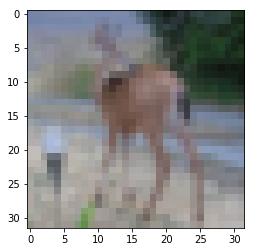

In [61]:
plt.imshow(input_test[100])

In [62]:
output_test[100]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [63]:
np.argmax(predict[100])

4

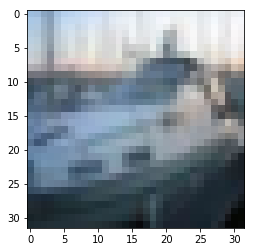

In [64]:
plt.imshow(input_test[2])

In [65]:
output_test[2]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [66]:
np.argmax(predict[2])

0